## Implementação e aplicação do algoritmo KNN para predição

### Função para dividir o dataset entre dados para treino e dados que serão usados para realizar as predições

In [79]:
from sklearn import datasets
import pandas as pd
import random 
import numpy as np
import operator
import math
import matplotlib.pyplot as plt  
import pylab as pl
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix 

def init(data, target, split):
    x_treino = []
    x_test = []
    y_treino = []
    y_test = []
    for i in range(data.shape[0]):
        if random.random() < split:
            x_treino.append(data[i])
            y_treino.append(target[i])
        else:
            x_test.append(data[i])    
            y_test.append(target[i])
    return x_treino, x_test, y_treino, y_test

### Métrica usada para calcular a distância entre duas instâncias

In [80]:
def distancia_euclidiana(instanceA, instanceB):
    ans = 0
    for i in range(len(instanceA)):
        ans += (instanceA[i] - instanceB[i]) ** 2
    return math.sqrt(ans)

### Função que retorna os K vizinhos mais próximos de uma instância

In [81]:
def get_nearest_neighbors(x_treino, y_treino, instance_test, k):

    distancias = []
    for i in range(len(x_treino)):
        dist = distancia_euclidiana(x_treino[i], instance_test)
        distancias.append((dist, y_treino[i]))
    distancias.sort(key=operator.itemgetter(0))
    neighbors = []
    for i in range(k):
        neighbors.append(distancias[i][1])
    return neighbors

In [82]:
def target_k_neighbors(vizinhos):
    ans = {}
    for i in vizinhos:
        if i in ans:
            ans[i] += 1
        else:
            ans[i] = 1
    
    qtd = 0
    for i, j in ans.items():
        if qtd < j:
            qtd = j
            best = i
    return best

### Função KNN
Essa função retorna um vetor indicando a predição feita para cada caso de teste

In [83]:
def knn(x_treino, y_treino, x_test, K):
    # scaler = StandardScaler()  
    # scaler.fit(x_treino)
    # x_treino = scaler.transform(x_treino)  
    # x_test = scaler.transform(x_test) 
    y_pred = []
    for i in range(len(x_test)):
        vizinhos = get_nearest_neighbors(x_treino, y_treino, x_test[i], K)
        ans = target_k_neighbors(vizinhos) 
        y_pred.append(ans)
    return y_pred

### Experimentos utilizando a base de dados IRIS 

In [84]:
K = 5
iris = datasets.load_iris()
x_treino, x_test, y_treino, y_test = init(iris.data, iris.target, 0.6)
y_pred = knn(x_treino, y_treino, x_test, K)

#### Resultados da predições usando aproximadamente 60% da base para treino e com parâmetro K = 5

In [85]:
for i in range(len(y_pred)):
    print('Original:' + iris.target_names[y_test[i]]  + ' Predito:' + iris.target_names[y_pred[i]])

Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:v

In [86]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[20  0  0]
 [ 0 19  0]
 [ 0  1 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        17

   micro avg       0.98      0.98      0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



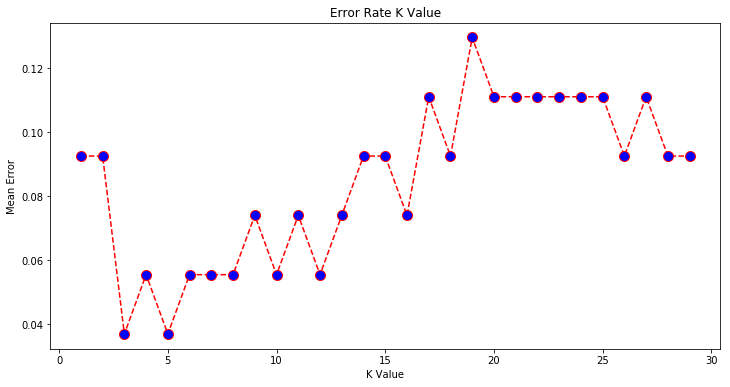

In [70]:
error = []
for i in range(1,30):
    y_pred = knn(x_treino, y_treino, x_test, i)
    ans = getPrecision(y_test, y_pred)
    error.append(ans)
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()   

O gráfico acima mostra o erro médio obtido variando o parâmetro K entre 1 e 30.

### Experimentos utilizando a base de dados Boston

In [87]:
K = 5
boston = datasets.load_boston()
x_treino, x_test, y_treino, y_test = init(boston.data, boston.target, 0.6)
y_pred = knn(x_treino, y_treino, x_test, K)

Taxa de erro na predição usando por 60% dos dados para teste e com o parâmetro K = 5

In [89]:
ans = getPrecision(y_pred, y_test)
print(ans)

0.9807692307692307


In [92]:
K = 10
boston = datasets.load_boston()
x_treino, x_test, y_treino, y_test = init(boston.data, boston.target, 0.8)
y_pred = knn(x_treino, y_treino, x_test, K)

In [95]:
ans = getPrecision(y_pred, y_test)
print(ans)

0.9831932773109243
